In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\Data Science\Machine Learning Classes\Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = df.iloc[:, -2:].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25063.652515864094,
 21818.11458845218]

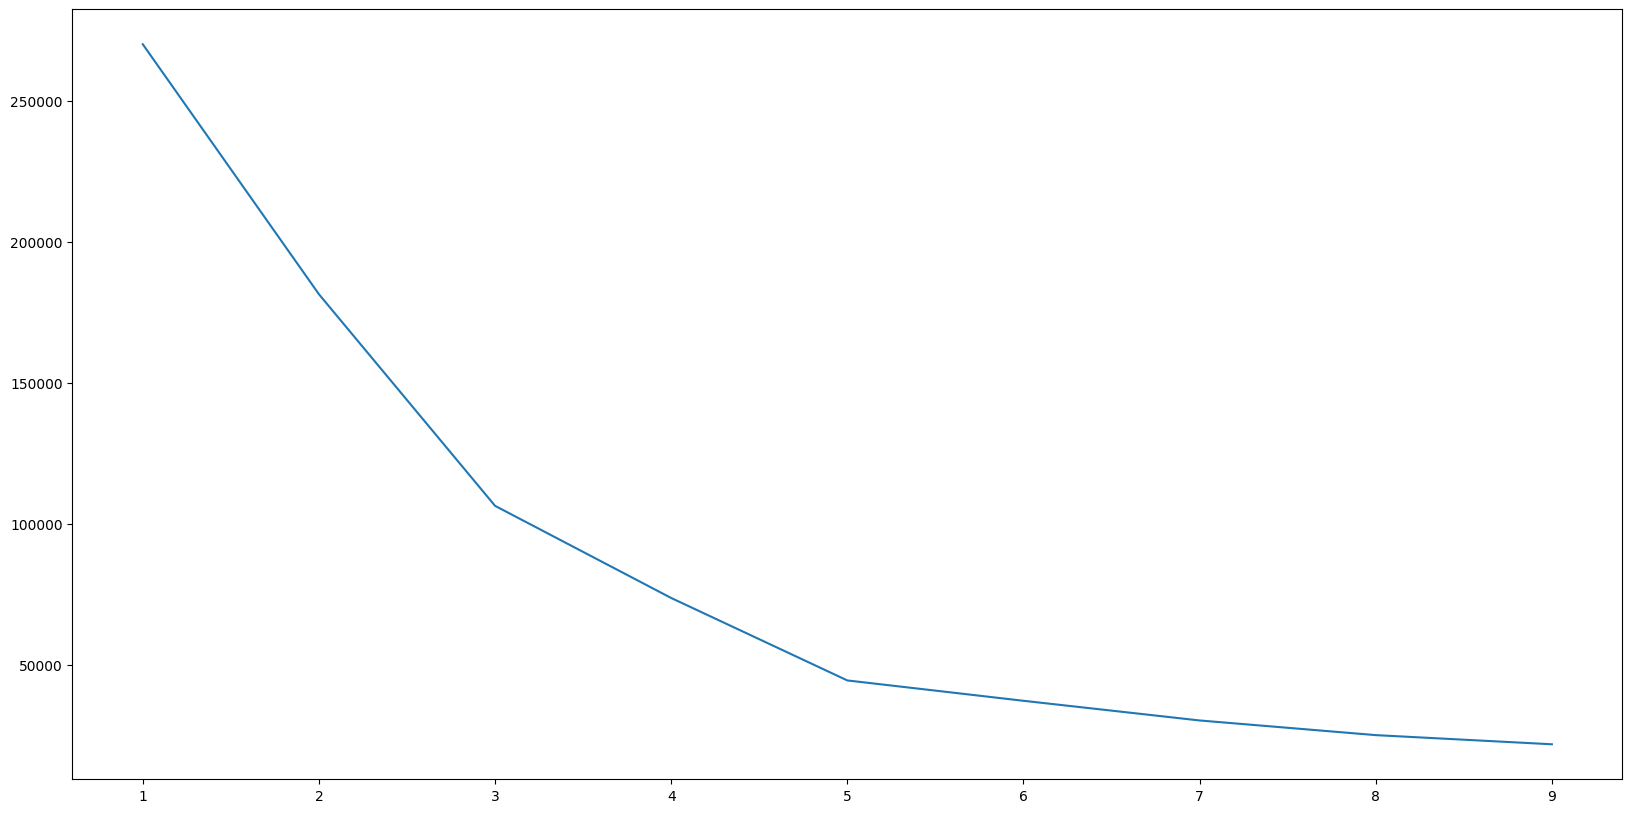

In [8]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1, 10)], wcss)

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="k-means++")
ymeans = kmeans.fit_predict(X)

In [10]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

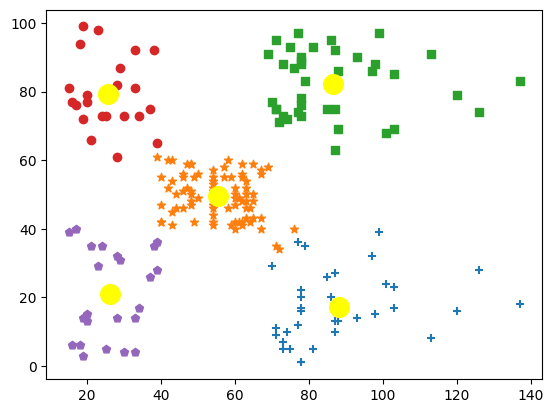

In [11]:
plt.scatter(X[ymeans==0, 0], X[ymeans==0, 1], marker="+")
plt.scatter(X[ymeans==1, 0], X[ymeans==1, 1], marker="*")
plt.scatter(X[ymeans==2, 0], X[ymeans==2, 1], marker = "s")
plt.scatter(X[ymeans==3, 0], X[ymeans==3, 1], marker = "o")
plt.scatter(X[ymeans==4, 0], X[ymeans==4, 1], marker = "p")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "yellow", s = 200)

In [12]:
evaluate = []
from sklearn.metrics import silhouette_score
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    evaluate.append(score)

In [13]:
evaluate

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5281944387251989,
 0.4579252386192864,
 0.4565077334305076]